## PyTorch Workflow

1. Obtendo dados
2. Construção do modelo
3. Fitting
4. Predições e evaluações
5. Salvando e carregando o modelo
6. Juntando tudo

In [1]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

### Obtendo dados

Machine learning é um jogo de duas partes:

1. Obter uma representação numérica para os dados; e
2. Construir um modelo que encontra padrões na representação numérica.

Para demonstrar isso, iremos criar um conjunto de dados _conhecido_ utilizando uma fórmula.

Vamos construir uma linha reta com parâmetros conhecidos.

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias # y = ax + b

In [3]:
print(X[:5], len(X))
print(Y[:5], len(Y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]]) 50
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]]) 50


Separando em datasets de treinamento e teste:

In [4]:
training_split = 40

X_TRAIN, Y_TRAIN = X[:training_split], Y[:training_split]
X_TEST, Y_TEST = X[training_split:], Y[training_split:]

print(len(X_TRAIN), len(X_TEST))
print(len(Y_TRAIN), len(Y_TEST))

40 10
40 10


In [5]:
def plot(train_data=X_TRAIN, train_labels=Y_TRAIN, test_data=X_TEST, test_labels=Y_TEST, predictions=None):
    plt.figure(figsize=(10, 7))

    # Dados de treinamento em azul:
    plt.scatter(train_data, train_labels, c='blue', s=4, label='Training data')

    # Dados de teste em vermelho:
    plt.scatter(test_data, test_labels, c='red', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='green', s=4, label='Predictions')

    plt.legend(prop={'size': 14})

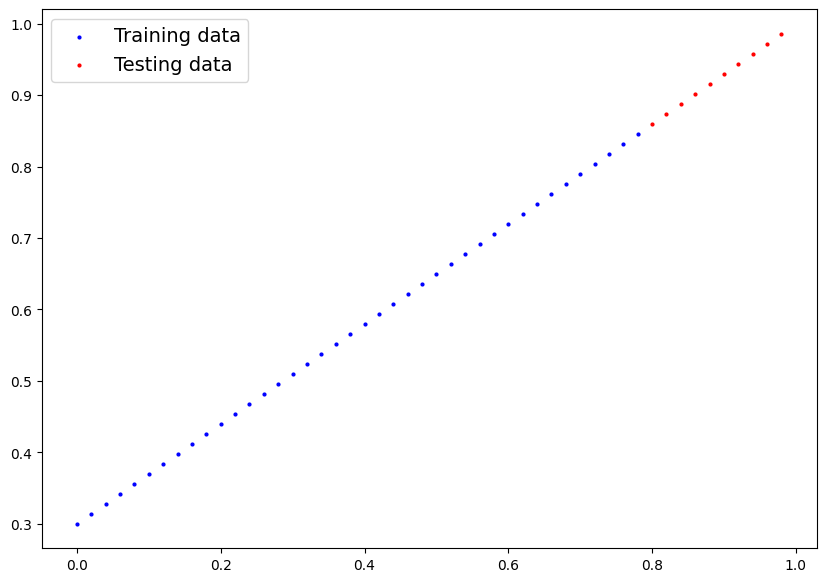

In [6]:
plot()

### Construção do modelo

O que o modelo faz:

* Inicia com valores aleatórios (`weight` e `bias`); e
* Observa os dados de treinamento e ajusta os valores aleatórios para melhor representar os valores ideais (desconhecidos pelo modelo).

Como ele faz isso? Através de dois algoritmos principais:

* Gradient descent
* Backpropagation

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x: torch.Tensor):
        return self.weights * x + self.bias # y = ax + b

In [8]:
torch.manual_seed(42)

linear_regression_model = LinearRegressionModel()

print(list(linear_regression_model.parameters()))
print(linear_regression_model.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### Fazendo predições

Para verificar a capacidade preditiva de nosso modelo, vejamos como ele prediz `Y_TEST` baseando-se em `X_TEST`.

Quando passamos dados pelo modelo, ele irá executar o método `forward`.

In [9]:
with torch.inference_mode():
    predictions = linear_regression_model(X_TEST)

print(predictions)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


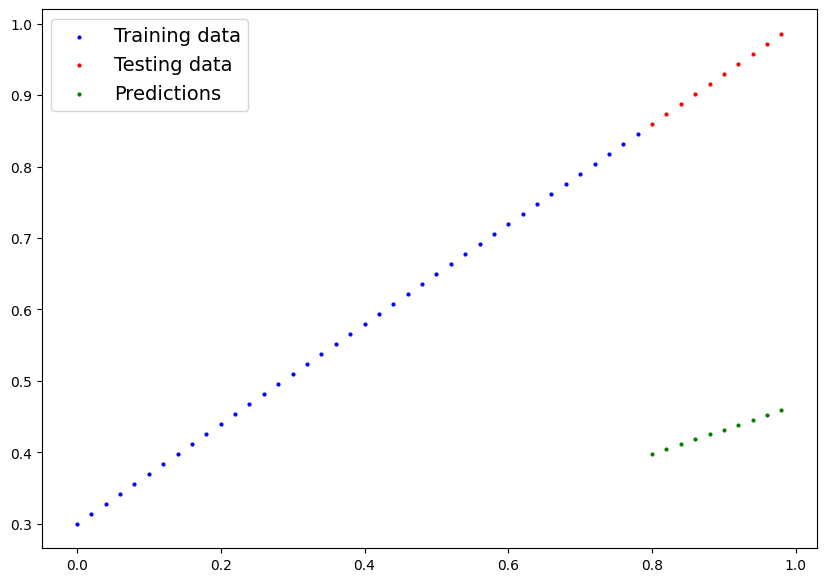

In [10]:
plot(predictions=predictions)

### Treinamento do modelo

O objetivo do treinamento é fazer com que os parâmetros do modelo saiam de um estado desconhecido (que pode ser aleatório) para um estado conhecido. Ou, em outras palavras, de uma representação pobre dos dados para uma representação melhor.

Um modo de averiguar o quão boas ou ruins as predições do modelo estão é através de uma _loss function_.

Coisas necessárias para construir um modelo:

* _Loss function_: uma função para medir o quão errado o modelo está (menor é melhor).
* _Optimizer_: ajusta os parâmetros do modelo com base no retorno da _loss function_.
* _Training loop_: específico do PyTorch.
* _Test loop_: específico do PyTorch.

Nota: _loss function_ também pode ser chamada de _cost function_ ou _criterion_, dependendo do contexto e área. Neste estudo, chamaremos simplesmente de _loss function_.

In [11]:
loss_function = nn.L1Loss() # torch.mean(torch.abs(y_pred - y_test))

optimizer = torch.optim.SGD(params=linear_regression_model.parameters(), lr=0.01) # lr = learning rate